In [49]:
#Write-up

#1. looking at our summary chart from the gouped Regimens we can see that two Regimen have significantly lower means 
# for their final Tumor volumes.  Those two are Ramicane and Capomulin.  

#2. While Ramicane and Capomulin are likely the top two options, Ceftamin also produced promising results.  Even though it 
# produced top 4 results it hasn't received the same sample size as the rest.  After looking at this data I would
# want to see more tests run on Ceftamin.

#3. With a strong correlation of .84 we can seafely colclude that there is a significant correlation between the weight 
# and tumor size of mice using Capomulin.  This is a great sign that Capomulin is working.

In [50]:
#Import Tools
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

from scipy.stats import linregress
from sklearn import datasets

In [2]:
#Import csv files
mouse_df = pd.read_csv("Mouse_metadata.csv")
study_df = pd.read_csv("Study_results.csv")


In [42]:
#Merge files using outer
data = pd.merge(mouse_df, study_df, on='Mouse ID', how='outer')
data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
#Create a summary table that includes mean median var std and sem
agg_df = data.groupby("Drug Regimen").agg(['mean', 'median','var', 'std','sem'])
summary_table = agg_df['Tumor Volume (mm3)']
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
#find frequency values of each drug
regimen_freq = data.groupby(["Drug Regimen"]).count()
regimen_freq = regimen_freq['Mouse ID']
regimen_freq.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Mouse ID, dtype: int64

In [11]:
#sort
regimen_freq = regimen_freq.sort_values(ascending = True)

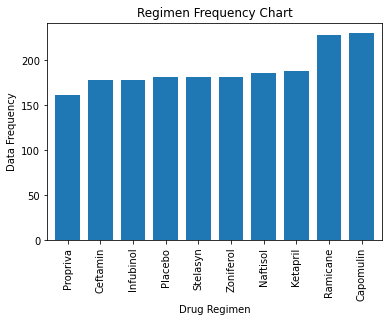

<Figure size 432x288 with 0 Axes>

In [12]:
#Create a bar chart
regimen_freq.plot(kind="bar", figsize=(6,4), width=.75)

#set chart title
plt.title("Regimen Frequency Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Frequency")

#Show chart and set layout
plt.show()
plt.tight_layout()



Text(0, 0.5, 'Data Frequency')

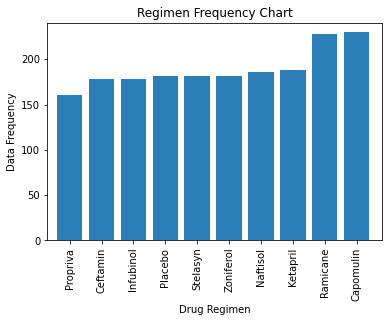

In [13]:
# Create an array that contains the number of users each language has
total_users = sorted([230, 178, 178, 188, 186, 181, 161, 228, 181, 182])
x_axis = np.arange(len(total_users))

#Create a bar chart
plt.bar(x_axis, total_users, color='tab:blue', alpha=0.95, align='center')

#Tick lables
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Propriva', 'Ceftamin', 'Infubinol', 'Placebo', 'Stelasyn', 'Zoniferol', 'Naftisol', 'Ketapril', 'Ramicane', 'Capomulin'],  rotation='vertical')

#Chart dimensions
plt.xlim(-0.70, len(x_axis)-0.20)
plt.ylim(0, max(total_users)+10)

#Set chart title and lables
plt.title("Regimen Frequency Chart")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Frequency")

In [47]:
#find the gender totals by eliminating duplicate ID's and counting sex
no_dup = data.drop_duplicates(subset=['Mouse ID'])
gender_split = no_dup['Sex'].value_counts()

#Count each gender and divede by the total
male_total = gender_split[0]
female_total = gender_split[1]
Total = female_total + male_total
gender_percentage = gender_split / Total

In [17]:
#create a table for the data
gender_split_df = pd.DataFrame({"Total Count": gender_split,
                                "Percentage": gender_percentage
                                })

In [48]:
gender_split_df

,Total Count,Percentage
Male,125,0.502008
Female,124,0.497992


Text(0, 0.5, ' ')

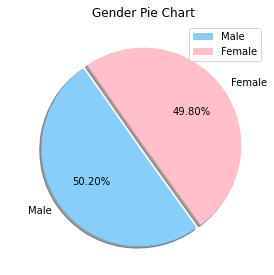

In [19]:
#Make Pie chart with colors and lables
colors = ['lightskyblue', 'pink']
explode = (0.05, 0)

plot = gender_split_df.plot.pie(y='Total Count',figsize=(4.5,4.5), colors = colors, startangle=125, explode = explode, shadow = True, autopct="%1.2f%%")
plt.title("Gender Pie Chart")
plt.ylabel(" ")

In [20]:
#Set variables 
labels = ["Male", "Female"]
percentages = [50.200803, 49.799197]
colors = ['lightskyblue', 'pink']
explode = (0.05, 0)

Text(0.5, 1.0, 'Gender Pie Chart')

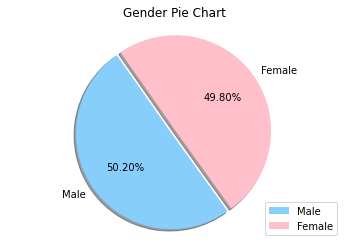

In [21]:
#Match previous chart using numpy
plt.pie(percentages, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=125)
plt.legend(loc="lower right")
plt.axis("equal")
plt.title("Gender Pie Chart")

In [23]:
#Looking at our summary table we can see that the four most promising regimen are
#Ramicane, Capomulin, Ceftamin and Infubinol
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
#Seperate into top 4 regimens
Ramicane = data.loc[data['Drug Regimen'] == 'Ramicane']
Capomulin = data.loc[data['Drug Regimen'] == 'Capomulin']
Infubinol = data.loc[data['Drug Regimen'] == 'Infubinol']
Ceftamin = data.loc[data['Drug Regimen'] == 'Ceftamin']

In [25]:
#We only want the ending tumor size
Ramicane_sort = Ramicane.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
Ramicane_df = Ramicane_sort.to_frame()

Capomulin_sort = Capomulin.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
Capomulin_df = Capomulin_sort.to_frame()

Infubinol_sort = Infubinol.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
Infubinol_df = Infubinol_sort.to_frame()

Ceftamin_sort = Ceftamin.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
Ceftamin_df = Ceftamin_sort.to_frame()

In [26]:
#Calculate quartiles,lower, upper and inter.
Ramicane_quartiles = Ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

print(f"The lower quartile is: {Ramicane_lowerq}")
print(f"The upper quartile is: {Ramicane_upperq}")
print(f"The interquartile range is: {Ramicane_iqr}")
print(f"The the median is: {Ramicane_quartiles[0.5]} ")

#Calculate outliers 
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")

The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [27]:
#Calculate quartiles,lower, upper and inter.
Capomulin_quartiles = Capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Ramicane_lowerq

print(f"The lower quartile is: {Capomulin_lowerq}")
print(f"The upper quartile is: {Capomulin_upperq}")
print(f"The interquartile range is: {Capomulin_iqr}")
print(f"The the median is: {Capomulin_quartiles[0.5]} ")

#Calculate outliers 
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Ramicane_iqr)
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 8.59875075
The the median is: 38.125164399999996 
Values below 19.479230714999996 could be outliers.
Values above 53.80702538 could be outliers.


In [28]:
#Calculate quartiles,lower, upper and inter.
Infubinol_quartiles = Infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Capomulin_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq

print(f"The lower quartile is: {Infubinol_lowerq}")
print(f"The upper quartile is: {Infubinol_upperq}")
print(f"The interquartile range is: {Infubinol_iqr}")
print(f"The the median is: {Infubinol_quartiles[0.5]} ")

#Calculate outliers 
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")

The lower quartile is: 54.04860769
The upper quartile is: 40.1592203
The interquartile range is: -13.889387389999996
The the median is: 60.16518046 
Values below 74.88268877499999 could be outliers.
Values above 19.325139215000007 could be outliers.


In [29]:
#Calculate quartiles,lower, upper and inter.
Ceftamin_quartiles = Ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq

print(f"The lower quartile is: {Ceftamin_lowerq}")
print(f"The upper quartile is: {Ceftamin_upperq}")
print(f"The interquartile range is: {Ceftamin_iqr}")
print(f"The the median is: {Ceftamin_quartiles[0.5]} ")

#Calculate outliers 
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


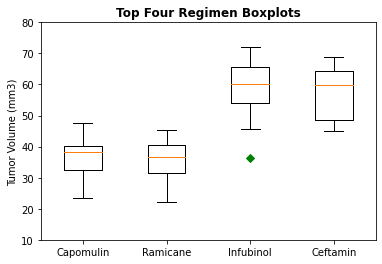

In [41]:
#Create a dataframe that only includes the top four most promising Regimen.
top_4_regimen = data[data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_4_regimen = top_4_regimen.sort_values(["Timepoint"], ascending=True)

#Grab the columns needed
top_4_regimen_data = top_4_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_4_regimen_sort = top_4_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_4_regimen_df = top_4_regimen_sort.to_frame()

#Create a list to use as labels and dataframe
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df = top_4_regimen_df.reset_index()

#Make a new dataframe grouped by the four promising Regimen
tumor_size_list = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
#organize into summary table
tumor_list_df = pd.DataFrame(tumor_size_list)
tumor_list_df = tumor_list_df.reindex(regimen_list)

tumor_volume = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

# plt.boxplot(tumor_vols, labels=top_4)
plt.boxplot(tumor_volume, 0, 'gD', labels=regimen_list)
plt.title("Top Four Regimen Boxplots", fontsize=12, fontweight="bold")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(10, 80)
plt.show()

In [33]:
#Organize a data table for Mouse ID: g288(randomly selected)
Line_chart = data[data["Mouse ID"].isin(["g288"])]
Line_chart_data = Line_chart[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Line_chart_data

,Mouse ID,Timepoint,Tumor Volume (mm3)
235,g288,0,45.000000
236,g288,5,45.839400
237,g288,10,46.304003
238,g288,15,42.172301
239,g288,20,42.957120
240,g288,25,42.368692
241,g288,30,42.874461
242,g288,35,38.954115
243,g288,40,36.356851
244,g288,45,37.074024


Text(0, 0.5, 'Data Frequency')

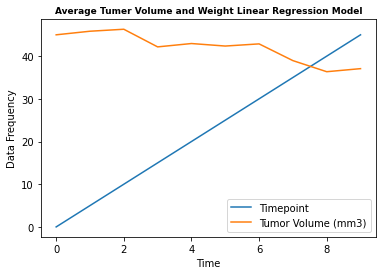

In [34]:
#Chart our line graph, set lables
Line_chart_df = Line_chart_data.reset_index()
Line_chart_final = Line_chart_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Line_chart_final.plot.line()
plt.title("Average Tumer Volume and Weight Linear Regression Model", fontsize=9, fontweight="bold")
plt.xlabel("Time")
plt.ylabel("Data Frequency")

Text(0.5, 1.0, 'Average Tumer Volume and Weight Model')

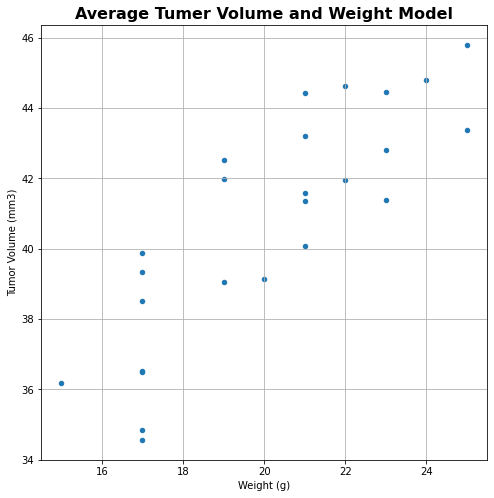

In [36]:
#Set up a dataframe with only Capomulin
scatter_plot = data[data["Drug Regimen"].isin(["Capomulin"])]
scattter_plot_data = scatter_plot[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

#Group by mouse ID
average_tumor_size = scattter_plot_data.groupby('Mouse ID')
average_tumor_size_df = average_tumor_size.mean()

#Create scatter plot
scatter_plot_Capomulin = average_tumor_size_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
plt.title("Average Tumer Volume and Weight Model", fontsize=16, fontweight="bold")

In [37]:
Import st
import scipy.stats as st

The correlation between average tumer size and weight is 0.84
The equation for slope and y intercept is y = 0.95x + 21.55


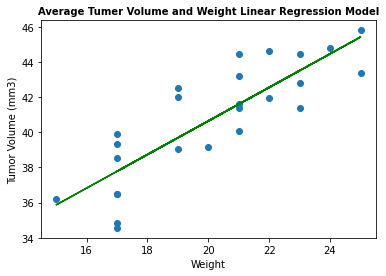

In [38]:
# Add the linear regression equation and line to plot
x_values = average_tumor_size_df['Weight (g)']
y_values = average_tumor_size_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Use st to calculate correlation
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between average tumer size and weight is {round(correlation[0],2)}")

#PLot our data in a scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g-")
print(f"The equation for slope and y intercept is {line_eq}")

#Titles and lables
plt.title("Average Tumer Volume and Weight Linear Regression Model", fontsize=10, fontweight="bold")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
